In [1]:
#Basic libraries
import numpy as np
import pandas as pd
from time import strftime
import itertools
import random
import os
from os import walk
from os.path import join

#Visualization and image processing libraries
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import cv2

#ML libraries
import tensorflow as tf
from keras.layers import Dense, Activation, Dropout

# To Ignore Warning
import warnings
warnings.filterwarnings("ignore")
from PIL import Image
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
#tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import MaxPooling2D, Dense, Dropout,Flatten, Conv2D, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator, DirectoryIterator
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import HeNormal


# Library Model Saving
import pickle
import joblib
import json

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
# Make new dataset
data = pd.read_csv('metadata.csv')
# Show first 10 data
data.head(10)

,Unnamed: 0,image,class,format,mode,shape
0,0,Cancer (1).jpg,tumor,JPEG,RGB,"(512, 512, 3)"
1,1,Cancer (1).png,tumor,PNG,L,"(300, 240)"
2,2,Cancer (1).tif,tumor,TIFF,RGB,"(256, 256, 3)"
3,3,Cancer (10).jpg,tumor,JPEG,RGB,"(512, 512, 3)"
4,4,Cancer (10).tif,tumor,TIFF,RGB,"(256, 256, 3)"
5,5,Cancer (100).jpg,tumor,JPEG,RGB,"(512, 512, 3)"
6,6,Cancer (1000).jpg,tumor,JPEG,RGB,"(290, 250, 3)"
7,7,Cancer (1001).jpg,tumor,JPEG,RGB,"(620, 620, 3)"
8,8,Cancer (1002).JPG,tumor,JPEG,RGB,"(338, 264, 3)"
9,9,Cancer (1003).jpg,tumor,JPEG,RGB,"(442, 353, 3)"


In [3]:
# Creating dataframe by iterating through filepaths
tumor_dir=r'D:/hacktiv/fase 2/gc7/final/p2-ftds015-hck-g7-albertn15\brian\Brain Tumor'
healthy_dir=r'D:/hacktiv/fase 2/gc7/final/p2-ftds015-hck-g7-albertn15/brian/Healthy'
filepaths = []
labels= []
dict_list = [tumor_dir, healthy_dir]
for i, j in enumerate(dict_list):
    flist=os.listdir(j)
    for f in flist:
        fpath=os.path.join(j,f)
        filepaths.append(fpath)
        if i==0:
          labels.append('cancer')
        else:
          labels.append('healthy')

Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")
tumor_data = pd.concat([Fseries,Lseries], axis=1)
tumor_df = pd.DataFrame(tumor_data)
print(tumor_df.head())
print(tumor_df["labels"].value_counts())

                                           filepaths  labels
0  D:/hacktiv/fase 2/gc7/final/p2-ftds015-hck-g7-...  cancer
1  D:/hacktiv/fase 2/gc7/final/p2-ftds015-hck-g7-...  cancer
2  D:/hacktiv/fase 2/gc7/final/p2-ftds015-hck-g7-...  cancer
3  D:/hacktiv/fase 2/gc7/final/p2-ftds015-hck-g7-...  cancer
4  D:/hacktiv/fase 2/gc7/final/p2-ftds015-hck-g7-...  cancer
labels
cancer     2513
healthy    2087
Name: count, dtype: int64


In [4]:
#splitting data
train_images, test_images = train_test_split(tumor_df, test_size=0.3, random_state=42)
train_set, val_set = train_test_split(tumor_df, test_size=0.2, random_state=42)

In [5]:
#shape of splitted data
print(train_set.shape)
print(test_images.shape)
print(val_set.shape)
print(train_images.shape)

(3680, 2)
(1380, 2)
(920, 2)
(3220, 2)


In [6]:
#Generate batches of tensor image data with real-time data augmentation.
image_gen = ImageDataGenerator(preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input)
train = image_gen.flow_from_dataframe(dataframe= train_set,x_col="filepaths",y_col="labels",
                                      target_size=(244,244),
                                      color_mode='rgb',
                                      class_mode="categorical", #used for Sequential Model
                                      batch_size=32,
                                      shuffle=False            #do not shuffle data
                                     )
test = image_gen.flow_from_dataframe(dataframe= test_images,x_col="filepaths", y_col="labels",
                                     target_size=(244,244),
                                     color_mode='rgb',
                                     class_mode="categorical",
                                     batch_size=32,
                                     shuffle= False
                                    )
val = image_gen.flow_from_dataframe(dataframe= val_set,x_col="filepaths", y_col="labels",
                                    target_size=(244,244),
                                    color_mode= 'rgb',
                                    class_mode="categorical",
                                    batch_size=32,
                                    shuffle=False
                                   )

Found 3680 validated image filenames belonging to 2 classes.
Found 1380 validated image filenames belonging to 2 classes.
Found 920 validated image filenames belonging to 2 classes.


In [7]:
classes=list(train.class_indices.keys())
print (classes)

['cancer', 'healthy']


In [8]:
def show_brain_images(image_gen):
    test_dict = test.class_indices
    classes = list(test_dict.keys())
    images, labels=next(image_gen) # get a sample batch from the generator
    plt.figure(figsize=(20,20))
    length = len(labels)
    if length<25:
        r=length
    else:
        r=25
    for i in range(r):
        plt.subplot(5,5,i+1)
        image=(images[i]+1)/2 #scale images between 0 and 1
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color="green",fontsize=16)
        plt.axis('off')
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


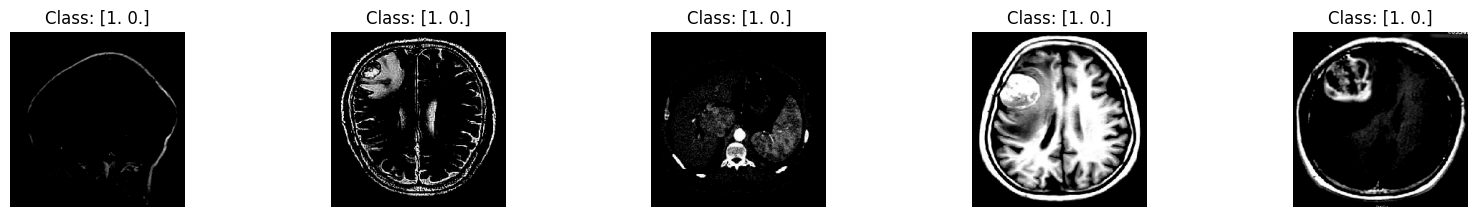

In [10]:
# Generate 5 random indices for the images
num_images = 5
batch = test.__next__()
idx = np.random.randint(len(batch[0]), size=num_images)

# Preprocess the images to match the input shape of the model
images = batch[0][idx]
class_labels = batch[1][idx]

# Display the images using matplotlib
plt.figure(figsize=(20, 5))
for i in range(num_images):
    plt.subplot(2, num_images, i+1)
    plt.imshow(images[i], cmap='bone')
    plt.title(f"Class: {class_labels[i]}")
    plt.axis('off')
plt.show()

In [15]:
# Use the model to predict the images
model = joblib.load("model.joblib")
predictions = model.predict(images)

# Post-process the predictions as needed
labels = np.zeros(num_images)
for i in range(num_images):
    if np.argmax(predictions[i]) == 1:
        labels[i] = 1
    else:
        labels[i] = 0
       
# Print the predictions
print(f'Predicted labels: {labels}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
a
a
a
a
a
Predicted labels: [0. 0. 0. 0. 0.]
